Kevin Armbruster - 930519-T711
xxx

In [131]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [147]:
import numpy as np
import maze as mz


In [133]:
# Description of the maze as a numpy array
maze = np.array([
    [0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0, 1, 1, 1],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 1, 2, 0, 0]
])
# with the convention 
# 0 = empty cell
# 1 = obstacle
# 2 = exit of the Maze

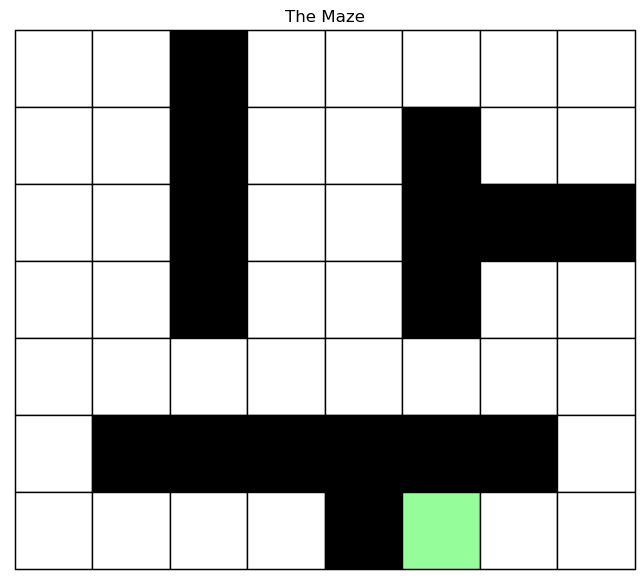

In [134]:
mz.draw_maze(maze)

In [179]:
env = mz.Maze(maze, minotaur_can_stay=True)
#env.show()

In [180]:
# Finite horizon
horizon = 20
# Solve the MDP problem with dynamic programming 
V, policy = mz.dynamic_programming(env,horizon)

In [181]:
# Simulate the shortest path starting from position A
start  = (0,0,6,5);
path = env.simulate_DP(start, policy);
path

[(0, 0, 6, 5),
 (0, 1, 5, 5),
 (1, 1, 4, 5),
 (2, 1, 4, 5),
 (3, 1, 5, 5),
 (4, 1, 4, 5),
 (4, 2, 4, 5),
 (4, 3, 4, 4),
 (4, 4, 5, 4),
 (4, 5, 6, 4),
 (4, 6, 6, 4),
 (4, 7, 6, 3),
 (5, 7, 6, 4),
 (6, 7, 6, 5),
 (6, 6, 5, 5),
 (6, 6, 5, 6),
 (6, 5, 5, 6),
 (6, 5, 5, 7),
 (6, 5, 5, 6),
 (6, 5, 5, 6),
 (6, 5, 4, 6)]

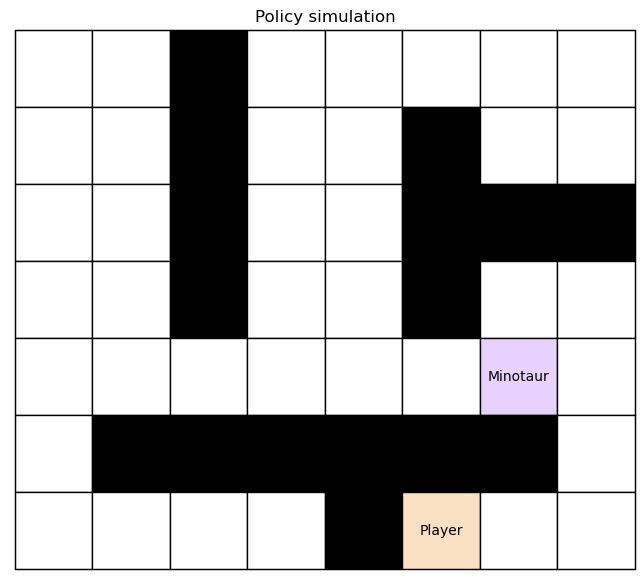

In [182]:
# Show the shortest path 
mz.animate_solution(maze, path)

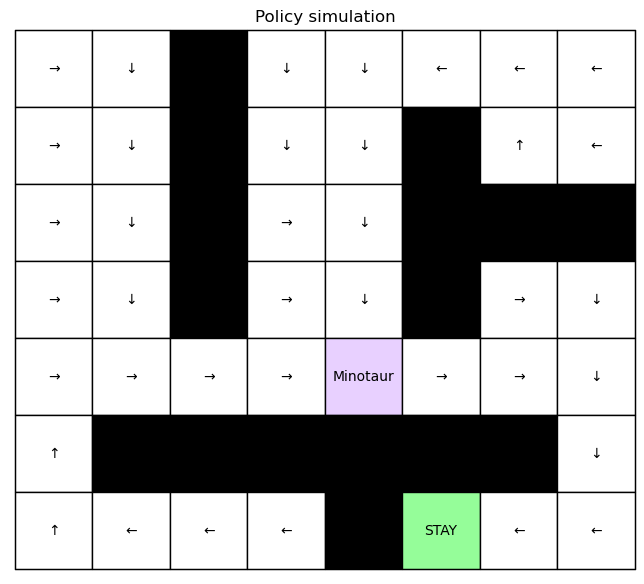

In [183]:
mz.visualize_policy(env, policy, (4,4))

In [139]:
# Discount Factor 
gamma   = 29/30
# Accuracy treshold
epsilon = 0.00001
V, policy = mz.value_iteration(env, gamma, epsilon)

Needed iterations:  343


In [140]:
start  = (0,0,6,5)
path = env.simulate_VI(start, policy)

In [141]:
start  = (0,0,6,5)
prob = 0
runs = 10000
for i in range(runs):
    path = env.simulate_VI(start, policy)
    prob += env.maze[path[-1][0:2]] == 2
prob = prob / runs
print("Probability to survive: ", prob)

Probability to survive:  0.3588


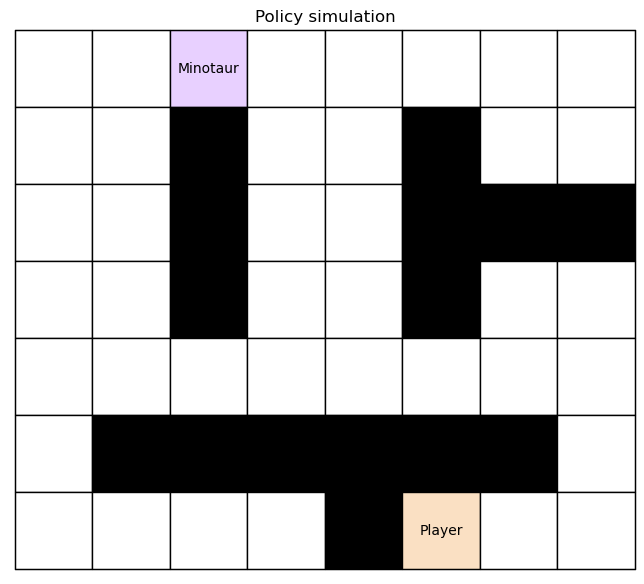

In [142]:
# Show the shortest path
mz.animate_solution(maze, path)

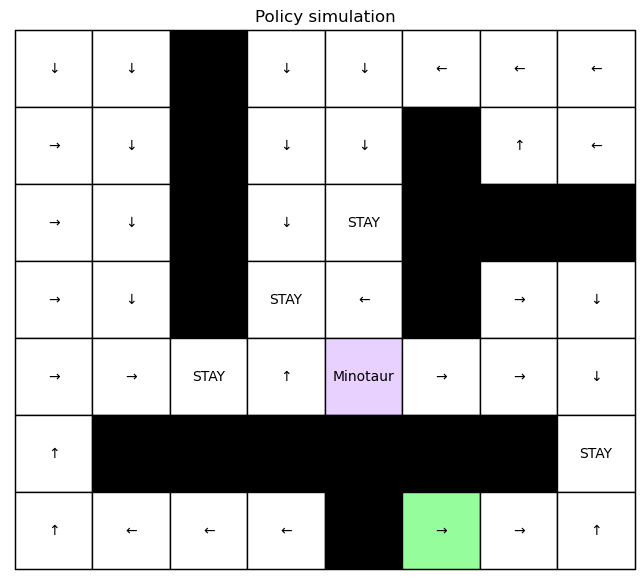

In [175]:
mz.visualize_policy(env, policy, (4,4))